In [10]:
import numpy as np
import random as rn
import matplotlib.pyplot as plt

[[1.82567679 0.25714999]
 [1.74699217 0.05754962]
 [1.12420838 0.38676134]
 [1.09022856 0.9645412 ]
 [1.71119917 0.48819521]]


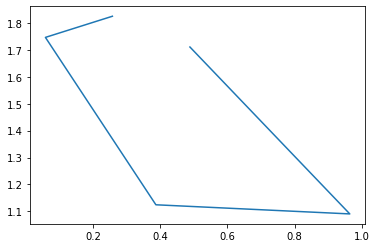

In [20]:
def generate_Random_LatLong_Within_RectArea(count,long_range,lat_range):
    """
    @purpose: generates a set of coordinates bounded by four bounding box coords
    @params: 
    count: number of coordinates to generate
    *args: bounding box coordinates
    """
    y1,y2 = lat_range
    x1,x2 = long_range
    #[lat,long]
    return np.array([[rn.uniform(y1,y2),rn.uniform(x1,x2)] for i in range(count)])

coords = generate_Random_LatLong_Within_RectArea(5,(0,1),(1,2))
print(coords)
latitudes,longitudes = coords[:,1],coords[:,0]
plt.plot(latitudes,longitudes)

In [23]:
items = ["masks","ventilators","testing kits"]
def randomRequestGenerator(items):
    """
    @purpose: generates random request objects 
    @param: a list of requested items
    @return: a dictionary of items and their (randomly generated) requested quantities
    """
    from collections import Counter
    res = Counter()
    for item in items:
        res[item] += rn.randrange(50,100)
    return res
randomRequestGenerator(items)

Counter({'masks': 77, 'ventilators': 74, 'testing kits': 68})

In [24]:
def randomInventoryGenerator(items):
    """
    generates a list of inventory items based on item names
    """
    return [
        {'name': item,'unit_price': rn.randrange(100,200),'quantity':rn.randrange(50,100)} for item in items
    ]
randomInventoryGenerator(items)

[{'name': 'masks', 'unit_price': 160, 'quantity': 84},
 {'name': 'ventilators', 'unit_price': 109, 'quantity': 75},
 {'name': 'testing kits', 'unit_price': 127, 'quantity': 81}]

In [29]:
def getRandomFacilityName():
    from faker import Faker
    fake = Faker()
    return fake.name() + ' memorial hospital'

def randomFacilitiesGenerator(count,long_range,lat_range):
    """
    generates random facility information
    """
    from math import floor,ceil
    coords = generate_Random_LatLong_Within_RectArea(count,long_range,lat_range)
    carrying_capacities = [rn.randrange(50,200) for i in range(count)]
    return [
        {
            'name': getRandomFacilityName(),
            'location': coords[i],
            'requests': randomRequestGenerator(items),
            'carrying_capacity': carrying_capacities[i],
            'covid_testing_available': rn.choice([True,False]),
            'type': rn.choice(["hospital","clinic","pharmacy"]),
            'covid_patient_count': rn.randrange(floor(0.2*carrying_capacities[i]),floor(0.8*carrying_capacities[i]))
        }
        for i in range(count)
    ]
randomFacilitiesGenerator(10,(0,1),(0,1))

ModuleNotFoundError: No module named 'faker'